# Trabalho 2 - Localização de objeto com variação de luminosidade

O trabalho 2 da disciplina de Processamento Digital de Imagens consiste em implementar uma tecnica de localização de objeto 
com variação de luminosidade.

# Integrantes

Graduandos da Universidade Federal de São Carlos.

* __Felipe Tavoni__

* __Gabriel Rodrigues Malaquias__

* __Lucas Cruz do Reis__

* __Renan Bobadilla Morelli__

Grande parte das vezes em que se quer localizar um objeto em uma imagem o objeto referência e como ele se encontra na imagem não estão na mesma intensidade luminosa, para que o objeto seja achado mesmo com intensidades de luminosidade diferentes é necessário que se varie a intensidade do objeto referência e procure por todas essas variações na imagem.

A seguir mostramos dois exemplos, no primeiro uma imagem do objeto mais claro do que se encontra na imagem é usado como referência, e no segundo exemplo a imagem referência é mais escura do que o modo como ela se encontra na imagem.

# Importação das bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
import cv2

In [2]:
img = plt.imread('images/MahomesPassGray.tiff')
img = img.astype(float)
filtro = plt.imread('images/FootballBallLighter.tiff')
filtro = filtro.astype(float)

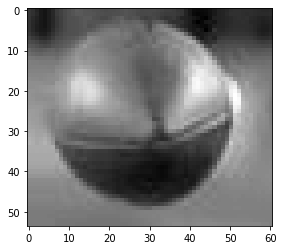

In [3]:
plt.imshow(filtro, cmap ="gray")

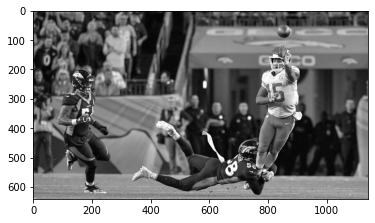

In [4]:
plt.imshow(img, cmap ="gray")

# Implementação da função que gera imagens com variação gamma

Essa função recebe uma imagem e um expoente gamma, e devolve a imagem elevada a esse expoente, gerando assim as variações da imagem que serão usadas na busca pelo objeto.

In [5]:
num_linhas, num_cols = filtro.shape

def gera_gamma(img, gamma):
    num_lin, num_col = img.shape
    img_mudada = np.zeros([num_lin, num_col], dtype = np.uint8)
    img_mudada = 255*((img/255)**gamma)
                
    return img_mudada

# Implementação da função que gera a diferença quadratica

Essa função recebe uma imagem e a imagem do objeto a ser procurado na primeira imagem, e devolve uma imagem diferença

In [6]:
#Codigo da diferença quadratica usando convolução

def diferenca_quadratica_corr(img, obj):
    w = np.ones(obj.shape)
    imgOw = sgn.correlate(img**2, w, mode='same')
    imgOobj = sgn.correlate(img, obj, mode='same')
    
    img_diff = imgOw + np.sum(obj**2) - 2*imgOobj
    
    return img_diff

# Implementação da função encontra o menor valor na imagem

Essa função recebe uma imagem e devolve o indice de menor valor da imagem e esse menor valor.

In [7]:
def encontra_minimo(img):
    '''Encontra posição do valor mínimo de img'''
    
    num_rows, num_cols = img.shape
    menor_valor = img[0,0]
    indice_menor_valor = (0, 0)
    for row in range(num_rows):
        for col in range(num_cols):
            valor = img[row,col]
            if valor<menor_valor:
                menor_valor = valor
                indice_menor_valor = (row, col)
            
    return menor_valor, indice_menor_valor

# Implementação da função que desenha um quadrado na imagem

Desenha um quadrado em uma cópia do array img_g. center indica o centro do quadrado e size o tamanho.

In [8]:
def draw_rectangle(img_g, center, size):
    
    half_num_rows_obj = size[0]//2
    half_num_cols_obj = size[1]//2

    img_rectangle = img_g.copy()
    pt1 = (center[1]-half_num_cols_obj, center[0]-half_num_rows_obj)
    pt2 = (center[1]+half_num_cols_obj, center[0]+half_num_rows_obj)
    cv2.rectangle(img_rectangle, pt1=pt1, pt2=pt2, color=255, thickness=3)
    
    return img_rectangle

# Implementação da busca da menor diferença

Essa parte do código printa a versão mais clara e versão de referência e a versão mais escura do objeto a ser procurado na imagem e também gera todas as imagens elevadas a gamma e apartir dessas imagens acha a menor diferença entre o objeto e a imagem, assim localizando o objeto na imagem.
Aqui é feita a busca onde o objeto referência é mais claro do que o objeto presente na imagem.

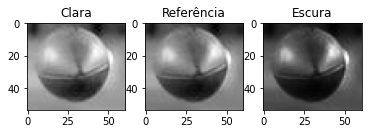

In [9]:
# Procurando a menor diferença entre todas as imagens com intensidades alteradas

dark = np.linspace(1.1,3,10,endpoint=False)
light = np.linspace(0.1,1,10,endpoint=False)

img_diff = diferenca_quadratica_corr(img, filtro)
menor_valor, indice = encontra_minimo(img_diff)

plt.subplot(1, 3, 1)
plt.imshow(gera_gamma(filtro, 0.1), cmap='gray')
plt.title('Clara')
plt.subplot(1, 3, 2)
plt.imshow(filtro, cmap = 'gray')
plt.title('Referência')
plt.subplot(1, 3, 3)
plt.imshow(gera_gamma(filtro, 3), cmap='gray')
plt.title('Escura')

for x in dark:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
    
for x in light:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
        
img_square = draw_rectangle(img, indice, filtro.shape)

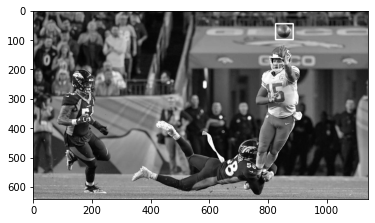

In [10]:
plt.imshow(img_square, 'gray')

In [11]:
img = plt.imread('images/TatumShot.tiff')
img = img.astype(float)
filtro = plt.imread('images/BasketballBallDark.tiff')
filtro = filtro.astype(float)

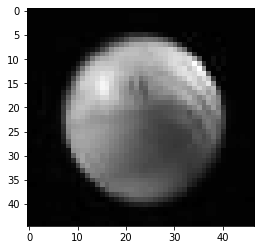

In [12]:
plt.imshow(filtro, cmap ="gray")

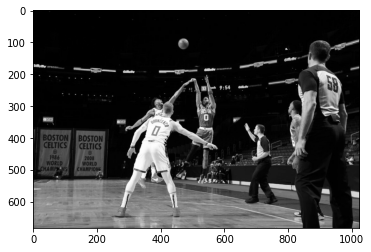

In [13]:
plt.imshow(img, cmap ="gray")

# Implementação da busca da menor diferença

Essa parte do código printa a versão mais clara e versão de referência e a versão mais escura do objeto a ser procurado na imagem e também gera todas as imagens elevadas a gamma e apartir dessas imagens acha a menor diferença entre o objeto e a imagem, assim localizando o objeto na imagem.
Aqui é feita a busca onde o objeto referência é mais escuro do que o objeto presente na imagem.

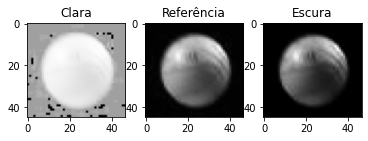

In [14]:
dark = np.linspace(1.1,1.5,5,endpoint=False)
light = np.linspace(0.1,1,10,endpoint=False)


img_diff = diferenca_quadratica_corr(img, filtro)
menor_valor, indice = encontra_minimo(img_diff)


plt.subplot(1, 3, 1)
plt.imshow(gera_gamma(filtro, 0.1), cmap='gray')
plt.title('Clara')
plt.subplot(1, 3, 2)
plt.imshow(filtro, cmap = 'gray')
plt.title('Referência')
plt.subplot(1, 3, 3)
plt.imshow(gera_gamma(filtro, 1.5), cmap='gray')
plt.title('Escura')
for x in dark:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
    
for x in light:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
        
img_square = draw_rectangle(img, indice, filtro.shape)

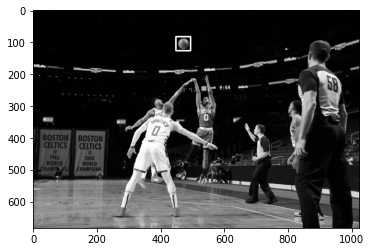

In [15]:
plt.imshow(img_square, 'gray')